Task Website: https://sites.google.com/view/simpletext-sota/home
Competition: https://codalab.lisn.upsaclay.fr/competitions/16616

Dataset: https://github.com/jd-coderepos/sota/tree/master



In [181]:
NOT_FOUND = "unanswerable\n"

In [182]:

import glob
import os
import json

TRAIN_PATH = "./data/train"


def path_join(*args):
    return os.path.join(*args).replace('\\', '/') 

def find(extension, *args):
    p = path_join(*args)
    res = list(filter(lambda x: x.endswith(extension), os.listdir(p)))
    if res:
        return path_join(p, res[0])
    else:
        return None

all_paths = [(p, find("tex", TRAIN_PATH, p), find("json", TRAIN_PATH, p)) for p in os.listdir(TRAIN_PATH)]

def read(i):
    # print(i)
    tex = None
    jsn = None
    try:
        i, tex_path, jsn_path = all_paths[i]
    except Exception as ex:
        print(i)
        raise ex
    try:
        with open(tex_path) as f:
            tex = f.read()

        try:
            with open(jsn_path) as f:
                jsn = json.load(f)
                print("loaded json")
        except:
            with open(jsn_path) as f:
                jsn = f.read()
                jsn = eval(jsn)
        return i, tex, jsn
    except:
        return i, tex, jsn

In [183]:
import pandas as pd

n = len(all_paths)
data = []
for i, t, j in [read(i) for i in range(n)]:
    # if j and j != 'unanswerable\n':
    data.append((i, t, j))



In [184]:
df_raw = pd.DataFrame(data)
df_raw = df_raw.rename({0: "id", 1: "tex", 2: "jsn"}, axis=1)
df_raw

,id,tex,jsn
0,2205.07139v1,\documentclass[runningheads]{llncs}\n\usepacka...,[{'LEADERBOARD': {'Task': 'Thoracic Disease Cl...
1,1908.04531v2,\documentclass{article}\n\n\n\usepackage{arxiv...,[{'LEADERBOARD': {'Task': 'Hate Speech Detecti...
2,1007.3769,"\documentclass{LMCS}\n\n\mathcode`:=""003A \ma...",unanswerable\n
3,1408.5825,"\n\n\n\n\n\documentclass[10pt,draftcls,onecolu...",unanswerable\n
4,2104.08663v2,\pdfoutput=1\n\n\n\documentclass[11pt]{article...,unanswerable\n
...,...,...,...
12283,0907.0649,\n\n\documentclass[twoside]{article}\n\usepack...,unanswerable\n
12284,2207.07922v1,\n\n\documentclass[runningheads]{llncs}\n\usep...,[{'LEADERBOARD': {'Task': 'Semi-Supervised Vid...
12285,2204.14047v2,\documentclass[sigconf]{acmart}\n\n\usepackage...,[{'LEADERBOARD': {'Task': 'Video Quality Asses...
12286,1611.06067v1,\def\year{2017}\relax\n\documentclass[letterpa...,[{'LEADERBOARD': {'Task': 'Skeleton Based Acti...


In [185]:
# is "id" unique?

total_ids = len(df_raw["id"])
nonduplicate_ids = len(df_raw["id"].drop_duplicates())
print(total_ids)
print(nonduplicate_ids)
# -> yes

12288
12288


# How many are Null / Unanswerable?

In [186]:
df = df_raw


df["isUnanswerable"] = df["jsn"] == NOT_FOUND
df["isNone"] = df["jsn"].isnull()

print(f"total len: {len(df)}")
print(f"None: {len(df[df['isNone']])}")
print(f"Unanswerable: {len(df[df['isUnanswerable']])}")



total len: 12288
None: 368
Unanswerable: 4013


# Leaderboard details

In [187]:
df["numLeaderboards"] = df["jsn"].apply(lambda c: len(c) if c and c != NOT_FOUND else 0)
df["hasLeaderboards"] = df["numLeaderboards"] > 0

print(f"= 0: {len(df[df['numLeaderboards'] == 0])}")
print(f"> 0: {len(df[df['numLeaderboards'] > 0])}")
print(f"> 5: {len(df[df['numLeaderboards'] > 5])}")
print(f"> 10: {len(df[df['numLeaderboards'] > 10])}")
print(f"> 40: {len(df[df['numLeaderboards'] > 40])}")
print(f"> 100: {len(df[df['numLeaderboards'] > 100])}")
print(f"> 200: {len(df[df['numLeaderboards'] > 200])}")

df_lt40 = df[df["numLeaderboards"] < 40]

= 0: 4381
> 0: 7907
> 5: 2908
> 10: 1294
> 40: 122
> 100: 17
> 200: 1


In [188]:
pct_hasLeaderboard =  len(df[df["hasLeaderboards"] == False]) / len(df[df["hasLeaderboards"] == True])
pct_hasLeaderboard

0.5540660174528899

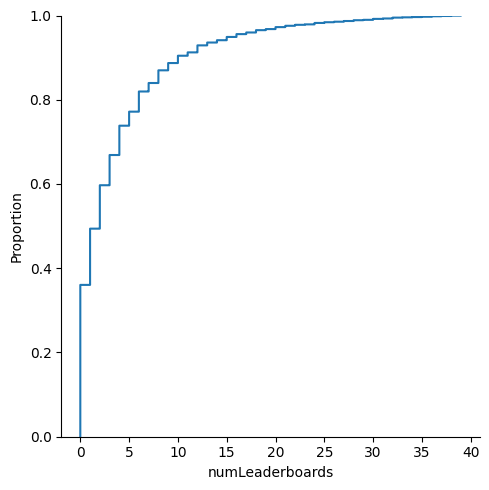

In [189]:
import seaborn as sns

sns.displot(df_lt40["numLeaderboards"], kind="ecdf")

<Axes: xlabel='numLeaderboards', ylabel='Count'>

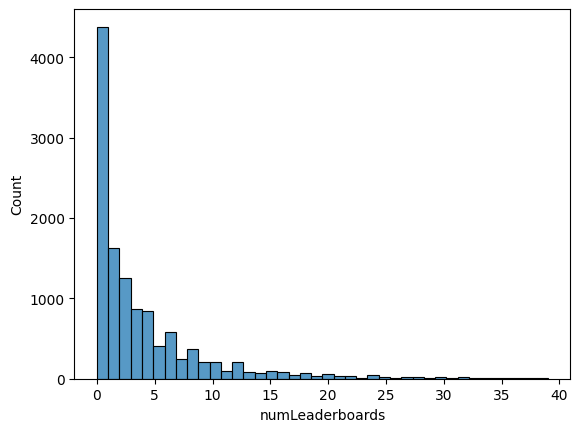

In [190]:
sns.histplot(df_lt40["numLeaderboards"], bins=40)

In [191]:
# Split dataframes into paper & leaderboard entries

df_entries = df[["id", "jsn"]]

df_entries = df_entries.explode("jsn")

df_entries["jsn"] = df_entries["jsn"].apply(lambda c: None if not c or c == NOT_FOUND else c["LEADERBOARD"])
df_entries = df_entries.dropna()

df_entries = pd.concat([df_entries, df_entries["jsn"].apply(pd.Series)], axis=1)
df_entries

,id,jsn,Task,Dataset,Metric,Score
0,2205.07139v1,"{'Task': 'Thoracic Disease Classification', 'D...",Thoracic Disease Classification,ChestX-ray14,AUROC,78.33
1,1908.04531v2,"{'Task': 'Hate Speech Detection', 'Dataset': '...",Hate Speech Detection,DKhate,F1,0.70
5,1911.04127v1,"{'Task': 'Temporal Action Localization', 'Data...",Temporal Action Localization,FineAction,mAP,6.75
5,1911.04127v1,"{'Task': 'Temporal Action Localization', 'Data...",Temporal Action Localization,FineAction,mAP IOU@0.5,10.65
5,1911.04127v1,"{'Task': 'Temporal Action Localization', 'Data...",Temporal Action Localization,FineAction,mAP IOU@0.75,6.43
...,...,...,...,...,...,...
12287,1903.11059v2,"{'Task': 'Neural Architecture Search', 'Datase...",Neural Architecture Search,ImageNet,Accuracy,75.5
12287,1903.11059v2,"{'Task': 'Neural Architecture Search', 'Datase...",Neural Architecture Search,ImageNet,Params,5.4M
12287,1903.11059v2,"{'Task': 'Neural Architecture Search', 'Datase...",Neural Architecture Search,CIFAR-10,Top-1 Error Rate,2.82%
12287,1903.11059v2,"{'Task': 'Neural Architecture Search', 'Datase...",Neural Architecture Search,CIFAR-10,Search Time (GPU days),224


In [192]:
# Tasks
tasks = df_entries.groupby("Task").count()["id"].sort_values(ascending=False)
print(len(tasks))

# Top 20
tasks[:20]

1370


Task
Image Classification                         2270
Atari Games                                  1443
Node Classification                          1113
Video Retrieval                               997
Object Detection                              997
Link Prediction                               941
Semantic Segmentation                         900
Semi-Supervised Video Object Segmentation     890
3D Human Pose Estimation                      889
Question Answering                            866
Image Super-Resolution                        643
Person Re-Identification                      548
Image Generation                              510
Visual Question Answering (VQA)               500
Neural Architecture Search                    488
Monocular Depth Estimation                    484
Anomaly Detection                             474
Video Super-Resolution                        459
Node Property Prediction                      447
3D Object Detection                          

In [193]:
# Dataset
dataset = df_entries.groupby("Dataset").count()["id"].sort_values(ascending=False)
print(len(dataset))

# Top 20
dataset[:20]

4802


Dataset
ImageNet                                      1603
COCO test-dev                                  792
Human3.6M                                      624
CIFAR-10                                       585
COCO minival                                   310
YouTube-VOS 2018                               291
CIFAR-100                                      252
MSR-VTT-1kA                                    247
FB15k-237                                      244
MSU Super-Resolution for Video Compression     225
DAVIS 2017 (val)                               222
ChEBI-20                                       220
WN18RR                                         212
Kinetics-400                                   212
DAVIS 2016                                     211
3DPW                                           197
Winoground                                     196
COCO                                           192
MPI-INF-3DHP                                   189
IconQA                 

In [194]:
# Metric
metric = df_entries.groupby("Metric").count()["id"].sort_values(ascending=False)
print(len(metric))

# Top 20
metric[:20]

2870


Metric
Accuracy              4357
Score                 1510
F1                    1358
PSNR                  1131
mAP                    820
mIoU                   816
Top 1 Accuracy         789
1:1 Accuracy           787
SSIM                   786
Number of params       701
FID                    614
AP                     586
Mean IoU               562
MAE                    541
Top-1 Accuracy         483
AUC                    447
Percentage correct     344
Accuracy (%)           337
Rank-1                 329
MRR                    314
Name: id, dtype: int64

# Which entries can be found in the text?

In [195]:
def is_in_tex(item, tex):
    return item in tex

In [199]:
df_combined = df_entries.merge(df[["id", "tex"]],on="id")
df_combined["Dataset_found"] = df_combined.apply(lambda row: row["Dataset"] in row["tex"], axis=1)
df_combined["Metric_found"] = df_combined.apply(lambda row: row["Metric"] in row["tex"], axis=1)

In [197]:
tot = len(df_combined)
ds_found = len(df_combined[df_combined['Dataset_found']])
metric_found = len(df_combined[df_combined['Metric_found']])
print(f"total TDMS: {len(df_combined)}")
print(f"Dataset found: {ds_found} -> {ds_found/tot}")
print(f"Metric found: {metric_found} -> {metric_found/tot}")

total TDMS: 54840
Dataset found: 26052 -> 0.475054704595186
Metric found: 20591 -> 0.37547410649161195


In [200]:
df_combined

,id,jsn,Task,Dataset,Metric,Score,tex,Dataset_found,Metric_found
0,2205.07139v1,"{'Task': 'Thoracic Disease Classification', 'D...",Thoracic Disease Classification,ChestX-ray14,AUROC,78.33,\documentclass[runningheads]{llncs}\n\usepacka...,True,True
1,1908.04531v2,"{'Task': 'Hate Speech Detection', 'Dataset': '...",Hate Speech Detection,DKhate,F1,0.70,\documentclass{article}\n\n\n\usepackage{arxiv...,False,True
2,1911.04127v1,"{'Task': 'Temporal Action Localization', 'Data...",Temporal Action Localization,FineAction,mAP,6.75,\def\year{2020}\relax\n\documentclass[letterpa...,False,False
3,1911.04127v1,"{'Task': 'Temporal Action Localization', 'Data...",Temporal Action Localization,FineAction,mAP IOU@0.5,10.65,\def\year{2020}\relax\n\documentclass[letterpa...,False,False
4,1911.04127v1,"{'Task': 'Temporal Action Localization', 'Data...",Temporal Action Localization,FineAction,mAP IOU@0.75,6.43,\def\year{2020}\relax\n\documentclass[letterpa...,False,False
...,...,...,...,...,...,...,...,...,...
54835,1903.11059v2,"{'Task': 'Neural Architecture Search', 'Datase...",Neural Architecture Search,ImageNet,Accuracy,75.5,"\documentclass[10pt,twocolumn,letterpaper]{art...",True,True
54836,1903.11059v2,"{'Task': 'Neural Architecture Search', 'Datase...",Neural Architecture Search,ImageNet,Params,5.4M,"\documentclass[10pt,twocolumn,letterpaper]{art...",True,True
54837,1903.11059v2,"{'Task': 'Neural Architecture Search', 'Datase...",Neural Architecture Search,CIFAR-10,Top-1 Error Rate,2.82%,"\documentclass[10pt,twocolumn,letterpaper]{art...",True,False
54838,1903.11059v2,"{'Task': 'Neural Architecture Search', 'Datase...",Neural Architecture Search,CIFAR-10,Search Time (GPU days),224,"\documentclass[10pt,twocolumn,letterpaper]{art...",True,False
